In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [31]:
whr_data = pd.read_csv('data/whr_data.csv')
whr_data.drop('Unnamed: 0', axis=1, inplace=True)
whr_data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country Code
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2014,ISL
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2014,DNK
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2014,NOR
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2014,CAN


In [32]:
data = pd.read_csv('data/inequality_data.csv', sep=';', encoding='utf-8')
data.drop('Random Junk Stuff', axis=1, inplace=True)
data.head()

,Country,Metric,Year,Value
0,Afghanistan,pall,2014,3159.3201
1,Afghanistan,pall,2015,3089.4865
2,Afghanistan,pall,2016,3034.9179
3,Afghanistan,pall,2017,3009.9520
4,Afghanistan,pall,2018,2920.7495


In [33]:
data['Metric'].unique()

array(['pall', 'p90p100', 'p50p90', 'p99p100'], dtype=object)

In [34]:
data = data.pivot_table('Value', ['Country', 'Year'], 'Metric').reset_index(drop=False)
data.head()

Metric,Country,Year,p50p90,p90p100,p99p100,pall
0,Afghanistan,2014,0.3977,0.4213,0.1457,3290.94780
1,Afghanistan,2015,0.3962,0.4233,0.1477,3204.31935
2,Afghanistan,2016,0.3944,0.4279,0.1474,3147.28445
3,Afghanistan,2017,0.3924,0.4315,0.1517,3115.16435
4,Afghanistan,2018,0.3924,0.4315,0.1517,3027.95350


In [35]:
import plotly.offline as py
import plotly.graph_objs as go
import geopandas as gpd
import pycountry

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('Unknown')
    return CODE

data['Country Code'] = alpha3code(data['Country'].str.strip())


In [36]:
data.loc[data['Country'] == 'Venezuela', 'Country Code'] = 'VEN'
data.loc[data['Country'] == 'Czech Republic', 'Country Code'] = 'CZE'
data.loc[data['Country'] == 'Taiwan', 'Country Code'] = 'TWN'
data.loc[data['Country'] == 'Taiwan Province of China', 'Country Code'] = 'TWN'
data.loc[data['Country'] == 'South Korea', 'Country Code'] = 'KOR'
data.loc[data['Country'] == 'Bolivia', 'Country Code'] = 'BOL'
data.loc[data['Country'] == 'Moldova', 'Country Code'] = 'MDA'
data.loc[data['Country'] == 'North Cyprus', 'Country Code'] = 'CYP'
data.loc[data['Country'] == 'Kosovo', 'Country Code'] = 'KOS'
data.loc[data['Country'] == 'Vietnam', 'Country Code'] = 'VNM'
data.loc[data['Country'] == 'Macedonia', 'Country Code'] = 'MKD'
data.loc[data['Country'] == 'Lao PDR', 'Country Code'] = 'LAO'
data.loc[data['Country'] == 'Swaziland', 'Country Code'] = 'SWZ'
data.loc[data['Country'] == 'Iran', 'Country Code'] = 'IRN'
data.loc[data['Country'] == 'DR Congo', 'Country Code'] = 'COD'
data.loc[data['Country'] == 'Congo (Brazzaville)', 'Country Code'] = 'COG'
data.loc[data['Country'] == 'Tanzania', 'Country Code'] = 'TZA'
data.loc[data['Country'] == 'Cote d’Ivoire', 'Country Code'] = 'CIV'
data.loc[data['Country'] == 'Syria', 'Country Code'] = 'SYR'
data.loc[data['Country'] == 'Hong Kong S.A.R., China', 'Country Code'] = 'HKG'
data.loc[data['Country'] == 'Trinidad & Tobago', 'Country Code'] = 'TTO'
data.loc[data['Country'] == 'Palestine', 'Country Code'] = 'PSE'
data.loc[data['Country'] == 'North Korea', 'Country Code'] = 'PRK'
data.loc[data['Country'] == 'Hong Kong S.A.R. of China', 'Country Code'] = 'HKG'
data.loc[data['Country'] == 'Curacao', 'Country Code'] = 'CUW'
data.loc[data['Country'] == 'USA', 'Country Code'] = 'USA'


In [50]:
from pycountry_convert import country_alpha2_to_continent_code, country_alpha3_to_country_alpha2

def findContinent(alpha3):
    try:
        return country_alpha2_to_continent_code(country_alpha3_to_country_alpha2(alpha3))
    except:
        return (np.nan)
    
data['Continent'] = data['Country Code'].apply(findContinent)

In [37]:
#data = data[data['Country Code'] != 'Unknown']
#data.to_csv('data/processed/inc_inequality.csv')

In [38]:
whr_data = whr_data[whr_data['Country Code'] != 'Unknown']
data = data[data['Country Code'] != 'Unknown']

#data = pd.merge(whr_data, data, on=['Country Code', 'Year'])
data = pd.merge(whr_data, data, on=['Country Code', 'Year'])

In [39]:
data.head()

,Country_x,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Country Code,Country_y,p50p90,p90p100,p99p100,pall
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2014,CHE,Switzerland,0.4411,0.3254,0.1103,54644.31450
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2014,ISL,Iceland,0.4526,0.2954,0.0831,46527.70345
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2014,DNK,Denmark,0.4385,0.3349,0.1291,47328.69240
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2014,NOR,Norway,0.4297,0.3212,0.1142,56949.14965
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2014,CAN,Canada,0.4103,0.4128,0.1513,41103.98395


<AxesSubplot:>

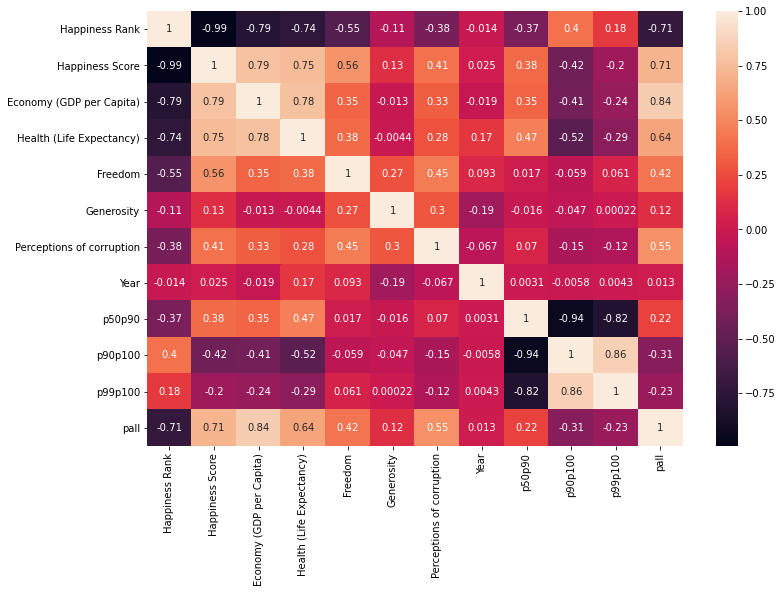

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

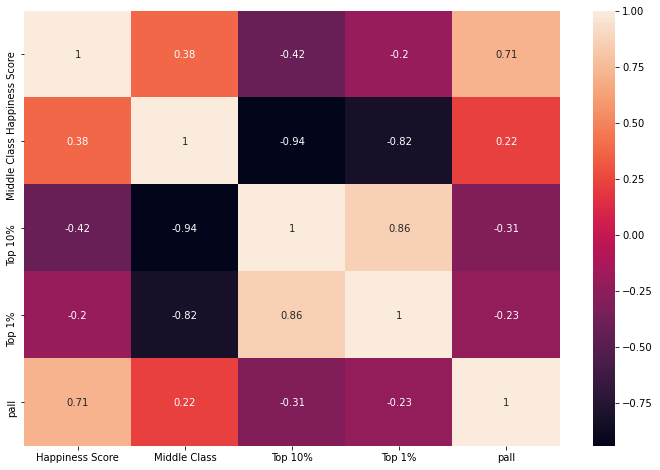

In [80]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Happiness Score', 'Middle Class', 'Top 10%', 'Top 1%', 'pall']].corr(), annot=True)

In [52]:
import plotly.offline as py
import plotly.graph_objs as go
import geopandas as gpd
import pycountry

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [53]:
data = data.drop('Country_y', axis=1)
data.columns = ['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Generosity', 'Perceptions of corruption', 'Year', 'iso_a3',
        'Middle Class', 'Top 10%', 'Top 1%', 'pall']

KeyError: "['Country_y'] not found in axis"

In [54]:
geo_data = pd.merge(world, data, on='iso_a3')
geo_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption,Year,Middle Class,Top 10%,Top 1%,pall,Continent
0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,146,3.781,0.285200,0.382150,0.328780,0.343770,0.057470,2014,0.4050,0.4512,0.1198,4311.98985,AF
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,149,3.666,0.471550,0.357000,0.317600,0.314720,0.050990,2015,0.3874,0.4720,0.1404,4397.71890,AF
2,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,153,3.349,0.511136,0.364509,0.390018,0.354256,0.066035,2016,0.3698,0.4929,0.1610,4532.64810,AF
3,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,153,3.303,0.455000,0.381000,0.481000,0.270000,0.097000,2017,0.3521,0.5137,0.1815,4642.49760,AF
4,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,153,3.231,0.476000,0.499000,0.417000,0.276000,0.147000,2018,0.3521,0.5137,0.1815,4733.68100,AF


In [78]:
import plotly.express as px


fig = px.choropleth(geo_data, locations="iso_a3",
                    color="Top 10%", #  
                    hover_name="Country",
                    animation_frame="Year",
                    title="Top 10% Income across the world",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [79]:
import chart_studio
import chart_studio.plotly as py

username = 'justuser'
api_key = 'OSgbKlPoTwcNl5dxhMQU'

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'income_top_map', auto_open=True)


'https://plotly.com/~justuser/10/'

In [76]:
fig = px.scatter(data.dropna(), x="Middle Class", y="Happiness Score",hover_name='Country', 
                 log_y=False, trendline="ols")
fig.show()